![image.png](pear.png)

***

# Welcome to Pear Inc. 

Hi there! 
My name is Robert! You can call me Bob 😉. <br>
I'm the communications officer (fancy title ha!) in our glorious company 😇.
My job is to help facilitate product development and market penetration 🤓. <br>
I spent endless hours talking to engineers, product managers, and  customers 😱  

Since we are a 20 people start-up (All of us have fancy names 😂), I also do some recruiting from time to time 💪 <br>
We are looking for **brave souls who are not afraid of a challenge and will help us** with our new product line of smart t-shirts! 🧐 <br> 

(Our CEO believes that smart t-shirts are the right direction for some reason 😅 I guess if you make something nobody needs, you won't have to sell it 🤓) <br>

Let me tell you a little bit more about our problem that you can help us with:<br>
We are creating a life changing smart t-shirt which has bluetooth and connects to your phone 🥳. They will be customizable outfits through downloaded applications. Our smart t-shirt will be developed with Google Wear OS which is a version of Google's Android operating system designed for smartwatches and other wearables. So users will be able to install custom programs through Google Play Store 🤭. <br> And we will sell them for 999.9$ a piece 💰💰💰<br>
But our engineers wanted to ensure that only Pear Inc. approved programs can be installed on our t-shirts because
market analysis showed that potential customers are afraid of ransomware that will break their "*premium*" t-shirts 🤦‍. So we need an antivirus for approving apps on the fly! <br>However, we don't want to install an off the shelf antivirus to our t-shirts 🤫, because BIG profit margins matter 🏦!

##### Enough chit-chat!
Let's get down to the business of why I contacted you: <br>
Our bright engineers came up with an algorithm that creates compressed signatures for the apps in the Google Play Store. It is called '*manifold averaging generally intelligent compressor*' or as we call it 'MAGIC'. <br>
The engineers told us that the outputs of MAGIC reflect the statistical properties of the uncompressed apps (whatever that may mean! 🤦‍). <br> MAGIC takes a Google Play Store app as an input and outputs a 4 dimensional numerical signature (they called it a vector but calling it a vector is not fancy enough for marketing! 🤪).   

Now, since these signatures are just numbers, an off the shelf antivirus can't work with them (even if it could, we can't install an off the shelf antivirus into our t-shirts -- too much computing power and space is needed). Therefore **we need a light weight proof of concept that takes these signatures as inputs and outputs labels (virus or not) for them.** We eventually want to install your program into our smart t-shirts, where it will scan a Google Play Store app (its signature to be precise!) and stop the app's execution if it thinks the app is a virus! But we are not going so far just yet so you only need to create the pipeline that take the signatures, and output labels for them. Don't worry about the rest, it is just a proof of concept at the end 😉. We are providing the dataset for you to develop your model.

In a nutshell: 
- There 4 dimensional (4 feature) numerical inputs (signatures) with labels!
- We need a simple model that takes these inputs and labels them (Virus, Not a Virus)
- We also need you to evaluate your model. Choose any metric you want, but don't forget to explain why, since I don't know much about this field (that is why we need your help!)

Things to keep in mind:
- There are less 'Virus' in the dataset than 'Not a Virus'. (Naturally!)
- While we call it MAGIC, it still sometimes doesn't work well 🤦‍, so there are signatures with missing features (missing values).
- I don't know much about these things so please show your work, your thinking process and please make it as clear as possible, otherwise I get confused 😵. (Visualizations of the data and comments in your code would be great!)

***
##### Let me describe the dataset, and you are ready to get to work!

It is a CSV file. Each row represents a signature for an app. First 4 columns from left to right represent dimensions (features) and the last column is the label (isVirus: True or False). 

- Visualize the data (so that people like me can understand!)
- Clean up the data (balance it out, impute missing values and so on... depending on the method you are going to use!)
- Visualize the cleaned data (so that people like me can understand the effect of cleaning process!)
- Create a simple model that performs reasonably well. (If it doesn't perform well, comment on why and how to improve it!)
- Evaluate the model with a testset you will create from the dataset. (Pretty plots make things easier to understand)
- Upload your code to a private github repo you can share with us, and invite us (https://github.com/tarikkranda, https://github.com/ltc0060 and https://github.com/ahmetkoklu) as collaborators so only we can see our super-secret project. 

And you are done! (Don't forget to comment, and show your work please 🤓)


### SOLUTION :


In [110]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import re
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import math
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from warnings import filterwarnings
filterwarnings('ignore')

In [111]:
df = pd.read_csv('dataset.csv')

In [112]:
df.head(5) #first 5 rows in dataset

,feature_1,feature_2,feature_3,feature_4,isVirus
0,-0.233467,0.308799,2.484015,1.732721,False
1,1.519003,1.238482,3.344450,0.783744,False
2,0.400640,1.916748,3.291096,-0.918519,False
3,-1.616474,0.209703,1.461544,-0.291837,False
4,1.480515,5.299829,2.640670,1.867559,True


<AxesSubplot:ylabel='isVirus'>

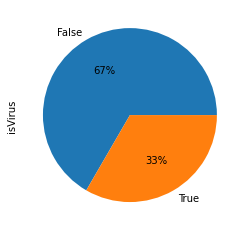

In [113]:
df.isVirus.value_counts().plot(kind='pie',autopct='%1.0f%%') #Percentage of virus or not

In [114]:
df.shape

(1999, 5)

In [115]:
df.dtypes

feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
isVirus         bool
dtype: object

In [116]:
df.duplicated().sum() #checking duplicated rows

0

In [117]:
df.isnull().sum()  #checking how many empty rows

feature_1    102
feature_2    100
feature_3    106
feature_4    102
isVirus        0
dtype: int64

In [118]:
df = df.interpolate(method ='linear', limit_direction ='forward') #filling empty rows with linear method

In [119]:
df.isnull().sum() #checking if empty values get filled

feature_1    0
feature_2    0
feature_3    0
feature_4    0
isVirus      0
dtype: int64

<AxesSubplot:ylabel='isVirus'>

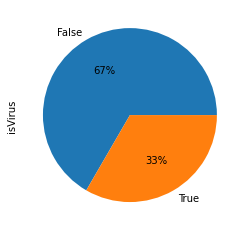

In [120]:
df.isVirus.value_counts().plot(kind='pie',autopct='%1.0f%%') #checking virus percentage after filling empty values is there any difference

In [122]:
df["Status"] = "" #creating status column for making decision on clicking to link

In [123]:
df

,feature_1,feature_2,feature_3,feature_4,isVirus,Status
0,-0.233467,0.308799,2.484015,1.732721,False,
1,1.519003,1.238482,3.344450,0.783744,False,
2,0.400640,1.916748,3.291096,-0.918519,False,
3,-1.616474,0.209703,1.461544,-0.291837,False,
4,1.480515,5.299829,2.640670,1.867559,True,
...,...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False,
1995,3.295793,3.562990,3.001932,2.499590,False,
1996,4.059027,1.977436,2.144760,4.257220,False,
1997,3.457310,3.962342,3.770837,3.243168,False,


In [124]:
df['Status'] = np.where(df['isVirus'], 'Stop','Pass') # giving status column to meaning if its virus stop sign if not pass

In [125]:
df 

,feature_1,feature_2,feature_3,feature_4,isVirus,Status
0,-0.233467,0.308799,2.484015,1.732721,False,Pass
1,1.519003,1.238482,3.344450,0.783744,False,Pass
2,0.400640,1.916748,3.291096,-0.918519,False,Pass
3,-1.616474,0.209703,1.461544,-0.291837,False,Pass
4,1.480515,5.299829,2.640670,1.867559,True,Stop
...,...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False,Pass
1995,3.295793,3.562990,3.001932,2.499590,False,Pass
1996,4.059027,1.977436,2.144760,4.257220,False,Pass
1997,3.457310,3.962342,3.770837,3.243168,False,Pass


In [126]:
df = df.replace({True: 'True', False: 'False'}) #replacing boolean value with object

In [127]:
df['isVirus'] = df['isVirus'].astype('string') #changing column object to string

In [128]:
df['Status'] = df['Status'].astype('string') #changing column object to string

In [129]:
df

,feature_1,feature_2,feature_3,feature_4,isVirus,Status
0,-0.233467,0.308799,2.484015,1.732721,False,Pass
1,1.519003,1.238482,3.344450,0.783744,False,Pass
2,0.400640,1.916748,3.291096,-0.918519,False,Pass
3,-1.616474,0.209703,1.461544,-0.291837,False,Pass
4,1.480515,5.299829,2.640670,1.867559,True,Stop
...,...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,False,Pass
1995,3.295793,3.562990,3.001932,2.499590,False,Pass
1996,4.059027,1.977436,2.144760,4.257220,False,Pass
1997,3.457310,3.962342,3.770837,3.243168,False,Pass


In [130]:
df = df.replace({'True': 0, 'False': 1}) #for machine learning changing string true false values with 1 and 0 if output virus value is 0 if not 1

In [131]:
df.dtypes

feature_1    float64
feature_2    float64
feature_3    float64
feature_4    float64
isVirus        int64
Status        string
dtype: object

In [132]:
df = df.replace({'Stop': 0, 'Pass': 1})#for machine learning changing string stop Pass values with 1 and 0

In [133]:
df  #checking if everything changed as ordered

,feature_1,feature_2,feature_3,feature_4,isVirus,Status
0,-0.233467,0.308799,2.484015,1.732721,1,1
1,1.519003,1.238482,3.344450,0.783744,1,1
2,0.400640,1.916748,3.291096,-0.918519,1,1
3,-1.616474,0.209703,1.461544,-0.291837,1,1
4,1.480515,5.299829,2.640670,1.867559,0,0
...,...,...,...,...,...,...
1994,2.532559,2.139847,3.859104,2.190373,1,1
1995,3.295793,3.562990,3.001932,2.499590,1,1
1996,4.059027,1.977436,2.144760,4.257220,1,1
1997,3.457310,3.962342,3.770837,3.243168,1,1


In [134]:
X = df.drop(['Status'],axis = 1)  #droping independent variable as we should click or not click to link acording to virus status
y = df['Status']  #assing rest variables for testing

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
#diving data into 2 parts train and test set , we give test set size of %20 percent and %80 for train data with randoms_state we divide data randomly

In [136]:
knn_model = KNeighborsRegressor() #creating model from library

In [137]:
model = knn_model.fit(X_train, y_train)  #training model with train data sets

In [147]:
new_data = [[4.059027],[1.977436],[2.144760],[4.257220],[0]] #giving random data to model if our model can comprehend giving numbers and output status as a 1 or 0, 1=non virus 0=for virus we giving isVirus status as 0 = (false=virus) as trying to trick model 

In [148]:
new_data = pd.DataFrame(new_data).T

In [149]:
model.predict(new_data) #making predict giving data as we said its virus for tricking model, model pridicted its not virus

array([1.])

In [150]:
y_pred = model.predict(X_test)

In [ ]:
#checking test eror

In [153]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.09848857801796106

In [ ]:
#checking train error

In [154]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

0.06802861480855305

In [155]:
#checking different k values for train errors

In [164]:
for k in range(30):
    k=k+1
    k_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = k_model.predict(X_train)
    error = np.sqrt(mean_squared_error(y_train, y_pred))
    
    print('kvalues-' ,k, 'error',error)

kvalues- 1 error 0.0
kvalues- 2 error 0.043314808182421
kvalues- 3 error 0.05714831664361067
kvalues- 4 error 0.06375767130633384
kvalues- 5 error 0.06802861480855305
kvalues- 6 error 0.07314756541523498
kvalues- 7 error 0.07637229266613965
kvalues- 8 error 0.0819936085612962
kvalues- 9 error 0.08446353316610336
kvalues- 10 error 0.08806160786197935
kvalues- 11 error 0.08933193288497597
kvalues- 12 error 0.09240304412037954
kvalues- 13 error 0.09649120593777046
kvalues- 14 error 0.10065134836952427
kvalues- 15 error 0.10319070630552958
kvalues- 16 error 0.10590328505228505
kvalues- 17 error 0.10849914019010327
kvalues- 18 error 0.11163105363781568
kvalues- 19 error 0.11437323425861048
kvalues- 20 error 0.11644086072457092
kvalues- 21 error 0.11998056072892076
kvalues- 22 error 0.12302849097982281
kvalues- 23 error 0.12531768558658993
kvalues- 24 error 0.12728097446041495
kvalues- 25 error 0.1287025746457711
kvalues- 26 error 0.13201044317707505
kvalues- 27 error 0.1347221630222017
kval

In [ ]:
#checking different k values for test errors

In [165]:
for k in range(30):
    k=k+1
    k_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = k_model.predict(X_test)
    error = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print('kvalues-' ,k, 'error',error)

kvalues- 1 error 0.08660254037844387
kvalues- 2 error 0.1
kvalues- 3 error 0.1
kvalues- 4 error 0.10077822185373188
kvalues- 5 error 0.09848857801796106
kvalues- 6 error 0.10069204977995476
kvalues- 7 error 0.10570463276391959
kvalues- 8 error 0.11039701082909809
kvalues- 9 error 0.10801234497346433
kvalues- 10 error 0.1105667219374799
kvalues- 11 error 0.11544022817454813
kvalues- 12 error 0.11953323573150876
kvalues- 13 error 0.12301681224399598
kvalues- 14 error 0.12637004294967236
kvalues- 15 error 0.13042665031009235
kvalues- 16 error 0.13306043035027354
kvalues- 17 error 0.13355661811462036
kvalues- 18 error 0.13647909440598052
kvalues- 19 error 0.13964735959391159
kvalues- 20 error 0.14111165791670086
kvalues- 21 error 0.14305541795999813
kvalues- 22 error 0.1462337085649583
kvalues- 23 error 0.14784207074712438
kvalues- 24 error 0.14979731676872957
kvalues- 25 error 0.15273506473629428
kvalues- 26 error 0.15592347538941914
kvalues- 27 error 0.1581464133828005
kvalues- 28 error 

In [166]:
# finding ideal k values

In [167]:
knn_values = {'n_neighbors': np.arange(1,30,1)} #giving array of number for our model to try all k values one by one

In [168]:
knn = KNeighborsRegressor()  #creating model again

In [169]:
knn_cv_model = GridSearchCV(knn, knn_values, cv = 10) 

In [170]:
knn_cv_model.fit(X_train, y_train) #train our model with different k values

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [171]:
knn_cv_model.best_params_ #best k value for our model which in this case is '1'

{'n_neighbors': 1}

In [173]:
#making model with ideal k value and checking error value

In [174]:
model = KNeighborsRegressor(n_neighbors=1)

In [175]:
model_knn = model.fit(X_train, y_train)  #training model again

In [176]:
model_knn #checking its k value which we give as 1 is true or not

KNeighborsRegressor(n_neighbors=1)

In [177]:
model_knn.predict(new_data) #with new k value make model predict its virus or not from our giving sample

array([1.])

In [178]:
model.predict(X_test)  #predicted test values not validated

array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0.

In [180]:
y_test[0:10] #predicted y test values

256     0
352     0
298     0
581     0
1288    0
1765    1
420     1
1587    1
65      1
1611    1
Name: Status, dtype: int64

In [182]:
g_d = pd.DataFrame({'y_test':y_test,
             'guessed values':y_pred})  #creating new data frame with test and guessed values from model

In [183]:
g_d

,y_test,guessed values
256,0,0.033333
352,0,0.000000
298,0,0.200000
581,0,0.500000
1288,0,0.000000
...,...,...
650,1,0.900000
1973,1,1.000000
261,1,1.000000
1305,0,0.000000


In [185]:
g_d['difference'] = g_d['y_test'] - g_d['guessed values'] #getting error difference

In [186]:
g_d

,y_test,guessed values,difference
256,0,0.033333,-0.033333
352,0,0.000000,0.000000
298,0,0.200000,-0.200000
581,0,0.500000,-0.500000
1288,0,0.000000,0.000000
...,...,...,...
650,1,0.900000,0.100000
1973,1,1.000000,0.000000
261,1,1.000000,0.000000
1305,0,0.000000,0.000000


In [188]:
np.sqrt(mean_squared_error(y_train, model_knn.predict(X_train))) #finding train error not validated

0.0

In [192]:
#validated train error
np.sqrt(-1 * cross_val_score(model_knn, X_train, y_train, cv = 10, scoring='neg_mean_squared_error')).mean()

0.07637923934602152